In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set_context('paper')

In [2]:
data_files = [
    '../data/results_45_1.csv',
    '../data/results_45_2.csv',
    '../data/results_55_1.csv',
    '../data/results_55_2.csv',
    '../data/results_65_1.csv',
    '../data/results_65_2.csv'
]

df = pd.concat(map(lambda file: pd.read_csv(file), data_files))
display(df.head(5))

progs = df['program'].unique()
print(f"Programs ({len(progs)}): {progs}")
flags = df['flag'].unique()
print(f"Flags ({len(flags)}): {flags}")

,timestamp,program,flag,return_code,execution_time,pkg_energy,dram_energy,user_time,sys_time,total_time,...,init_sys,mut_cpu,mut_sys,total_gc_cpu,total_gc_sys,minor_gc_cpu,minor_gc_sys,major_gc_cpu,major_gc_sys,balance
0,1683221035,circsim,-O2,0,245286.912,1602169.0,52734.0,0.21,0.00,0.22,...,0.0,0.118,0.118,0.101,0.101,0.093,0.093,0.008,0.008,1
1,1683221036,circsim,-O2,0,237353.362,1583614.0,52795.0,0.21,0.00,0.21,...,0.0,0.118,0.118,0.097,0.098,0.089,0.090,0.008,0.008,1
2,1683221042,circsim,-O2,0,238780.570,1529782.0,48157.0,0.19,0.02,0.21,...,0.0,0.117,0.116,0.097,0.098,0.090,0.090,0.007,0.007,1
3,1683221054,circsim,-O2,0,241376.445,1528561.0,48401.0,0.21,0.00,0.21,...,0.0,0.119,0.118,0.098,0.099,0.090,0.091,0.008,0.008,1
4,1683221066,circsim,-O2,0,244602.692,1515926.0,49377.0,0.20,0.02,0.22,...,0.0,0.120,0.120,0.100,0.100,0.092,0.092,0.008,0.008,1


Programs (18): ['circsim' 'hash' 'bernouilli' 'integrate' 'coins' 'queens' 'anna' 'fluid'
 'binary-trees' 'pidigits' 'callback001' 'chan' 'power' 'treejoin'
 'fannkuch-redux' 'n-body' 'reverse-complement' 'spectral-norm']
Flags (27): ['-O2' '-fno-case-merge' '-fno-case-folding' '-fno-call-arity'
 '-fno-exitification' '-fno-cmm-elim-common-blocks' '-fno-cmm-sink'
 '-fno-block-layout-cfg' '-fno-cpr-anal' '-fno-cse' '-fno-stg-cse'
 '-fno-dmd-tx-dict-sel' '-fno-do-eta-reduction'
 '-fno-do-lambda-eta-expansion' '-fno-float-in' '-fno-full-laziness'
 '-fno-ignore-asserts' '-fno-loopification' '-fno-specialise'
 '-fno-solve-constant-dicts' '-fno-stg-lift-lams' '-fno-strictness'
 '-fno-unbox-small-strict-fields' '-fno-spec-constr' '-fno-liberate-case'
 '-funfolding-use-threshold=40' '-funfolding-use-threshold=160']


In [8]:
df['total_energy'] = df['pkg_energy'] + df['dram_energy']

ratio_df = []
for prog in progs:
    for flag in flags:
        data = df[(df['program'] == prog) & (df['flag'] == flag)]

        avg_total = data['total_energy'].mean()
        avg_dram = data['dram_energy'].mean()
        avg_pkg = data['pkg_energy'].mean()
    
        ratio_df.append([prog, flag, avg_total, avg_dram, avg_pkg, avg_dram / avg_total * 100, avg_pkg / avg_total * 100])
ratio_df = pd.DataFrame(ratio_df, columns=['program', 'flag', 'avg_total', 'avg_dram', 'avg_pkg', 'ratio_dram', 'ratio_pkg'])
ratio_df

,program,flag,avg_total,avg_dram,avg_pkg,ratio_dram,ratio_pkg
0,circsim,-O2,1.637370e+06,50623.941667,1.586746e+06,3.091784,96.908216
1,circsim,-fno-case-merge,1.612321e+06,51167.666667,1.561153e+06,3.173541,96.826459
2,circsim,-fno-case-folding,1.617852e+06,51242.483333,1.566610e+06,3.167315,96.832685
3,circsim,-fno-call-arity,1.630522e+06,51153.000000,1.579369e+06,3.137217,96.862783
4,circsim,-fno-exitification,1.623939e+06,50435.258333,1.573504e+06,3.105735,96.894265
...,...,...,...,...,...,...,...
481,spectral-norm,-fno-unbox-small-strict-fields,4.740781e+05,17393.466667,4.566847e+05,3.668903,96.331097
482,spectral-norm,-fno-spec-constr,4.683622e+05,17555.658333,4.508065e+05,3.748308,96.251692
483,spectral-norm,-fno-liberate-case,4.692782e+05,17394.933333,4.518832e+05,3.706742,96.293258
484,spectral-norm,-funfolding-use-threshold=40,4.664838e+05,17334.483333,4.491493e+05,3.715988,96.284012


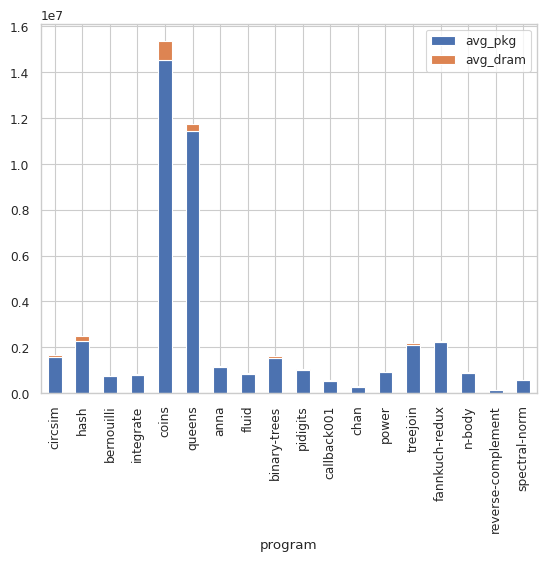

In [4]:
bar_plot = ratio_df[['program', 'avg_pkg', 'avg_dram']]
bar_plot.plot(kind='bar', stacked=True, x='program')
plt.show()

# ax = sns.barplot(ratio_df, x='program', y='avg_pkg')
# ax = sns.barplot(ax=ax, data=ratio_df, x='program', y='avg_dram')
# plt.xticks(rotation=90)
# plt.show()

In [9]:
avg_total = df['total_energy'].mean()
avg_dram = df['dram_energy'].mean()
avg_pkg = df['pkg_energy'].mean()

print(f'Avg. Total: {avg_total:.2f}')
print(f'Avg. DRAM: {avg_dram:.2f} ({avg_dram / avg_total * 100:.2f} %)')
print(f'Avg. PKG: {avg_pkg:.2f} ({avg_pkg / avg_total * 100:.2f} %)')

Avg. Total: 2525481.53
Avg. DRAM: 107337.33 (4.25 %)
Avg. PKG: 2418144.20 (95.75 %)


In [10]:
ratio_df['ratio_dram'].mean()

4.269774833250144